# Visualization of CyberSecurity Breaches

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.shedoesthecity.com/wp-content/uploads/files/2017/01/hacks.jpg")

In [2]:
#import packages
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

from bokeh.io import output_notebook, show
output_notebook()


Loading BokehJS ...

## Background

In [3]:
Image(url= "http://2we26u4fam7n16rz3a44uhbe1bq2.wpengine.netdna-cdn.com/wp-content/uploads/050914_1121_2013DataBre5.png")

## Reasons for Hacking

In [4]:
Image(url= "https://paulsparrows.files.wordpress.com/2013/04/march-2013-motivations.png")

As seen above a 50% of all hacking is because of something called hacktivism or hacking in the name of what the hacker believes is "Just". Most of what we will deal with in this data set is Cyber-Crime which typically involves a hacker that hacks a business or corporation to steal records or private information. The hacker then typically turns around and sells this information on the Deep Web for bitcoin or cash.

## DataSet
Download the dataset by going to https://docs.google.com/spreadsheets/d/1Je-YUdnhjQJO_13r8iTeRxpU2pBKuV6RVRHoYCgiMfg/edit#gid=322165570 and then download the file as a csv file.
More information about the data set and cybersecurity can be found at http://www.informationisbeautiful.net/visualizations/worlds-biggest-data-breaches-hacks/

### About the DataSet
The data set shows the largest and most well known data breaches since 2004. The data set shows the year the event happened the the number of records stolen and the number lost. The data set also shows the type of data breach and the type of company that it involved. It also displays the level of sensativity for the data. There are some limitations to this dataset however including the lack of type of hack and what time of the year it happened, or who it was performed by. Much of this information is either kept private or just unknown. The user will however be able to get some good information out of this visualization tutorial.

In [5]:
#remove first row from csv file
with open("Data.csv",'r') as f:
    with open("updated_test.csv",'w') as f1:
        f.next() # skip header line
        for line in f:
            f1.write(line)

In [6]:
df = pd.read_csv("updated_test.csv")
df.head()


,Entity,alternative name,story,YEAR,records lost,ORGANISATION,METHOD OF LEAK,interesting story,NO OF RECORDS STOLEN,DATA SENSITIVITY,UNUSED,UNUSED.1,Exclude,Unnamed: 13,1st source link,2nd source link,3rd source,source name
0,NaN,NaN,Elaboration if there's an interesting story or...,"years are encoded (0=2004, 8 = 2012, 9 = 2013,...","(use 3m, 4m, 5m or 10m to approximate unknown ...",NaN,NaN,NaN,"(use 3m, 4m, 5m or 10m to approximate unknown ...",1. Just email address/Online information 20 SS...,NaN,NaN,Show this item in the viz?,NaN,NaN,NaN,NaN,NaN
1,AOL,American Online,A former America Online software engineer stol...,0,92000000,web,inside job,NaN,92000000,1,NaN,NaN,NaN,NaN,http://money.cnn.com/2004/06/23/technology/aol...,http://www.msnbc.msn.com/id/8985989/#.UFcN8RgUwaA,NaN,CNN
2,Cardsystems Solutions Inc.,"Third-party payment processor for Visa, Master...",CardSystems was fingered by MasterCard after i...,1,40000000,financial,hacked,y,40000000,300,NaN,NaN,NaN,NaN,http://www.msnbc.msn.com/id/8260050/ns/technol...,NaN,NaN,MSNBC
3,Ameritrade Inc.,Computer backup tape containing personal infor...,online broker,1,200000,financial,lost / stolen device or media,NaN,200000,20,NaN,NaN,NaN,NaN,http://www.nbcnews.com/id/7561268/,NaN,NaN,NBC
4,Citigroup,NaN,Blame the messenger! A box of computer tapes c...,1,3900000,financial,lost / stolen device or media,y,3900000,300,NaN,NaN,NaN,NaN,http://www.nytimes.com/2005/06/07/business/07d...,NaN,NaN,NY Times


## Data Prep

In [7]:
Image(url= "https://enterprisersproject.com/sites/default/files/styles/620x350/public/images/CIO%20Crossing%20the%20gap%20to%20big%20data%202.png?itok=GzTevfgC")

#### Data Prep
Before we can visualize and analyze the data we must first clean and prep the data. The data set is raw and has many unused columns and null values. To prep the data we must drop or replace null values and drop unused or unnecessary columns. It May also help to cleanup and rename the columns to help better understand the data.

In [8]:
#drop first explinationn row
df = df.drop(df.index[0])
df.head()

,Entity,alternative name,story,YEAR,records lost,ORGANISATION,METHOD OF LEAK,interesting story,NO OF RECORDS STOLEN,DATA SENSITIVITY,UNUSED,UNUSED.1,Exclude,Unnamed: 13,1st source link,2nd source link,3rd source,source name
1,AOL,American Online,A former America Online software engineer stol...,0,92000000,web,inside job,NaN,92000000,1,NaN,NaN,NaN,NaN,http://money.cnn.com/2004/06/23/technology/aol...,http://www.msnbc.msn.com/id/8985989/#.UFcN8RgUwaA,NaN,CNN
2,Cardsystems Solutions Inc.,"Third-party payment processor for Visa, Master...",CardSystems was fingered by MasterCard after i...,1,40000000,financial,hacked,y,40000000,300,NaN,NaN,NaN,NaN,http://www.msnbc.msn.com/id/8260050/ns/technol...,NaN,NaN,MSNBC
3,Ameritrade Inc.,Computer backup tape containing personal infor...,online broker,1,200000,financial,lost / stolen device or media,NaN,200000,20,NaN,NaN,NaN,NaN,http://www.nbcnews.com/id/7561268/,NaN,NaN,NBC
4,Citigroup,NaN,Blame the messenger! A box of computer tapes c...,1,3900000,financial,lost / stolen device or media,y,3900000,300,NaN,NaN,NaN,NaN,http://www.nytimes.com/2005/06/07/business/07d...,NaN,NaN,NY Times
5,Automatic Data Processing,"Business outsourcing, payrolls, benefits",NaN,1,125000,financial,poor security,NaN,130000,20,NaN,NaN,NaN,NaN,http://abcnews.go.com/Technology/story?id=2160...,NaN,NaN,ABC


In [9]:
#drop unnecessary cloumns
df = df.drop(['interesting story', 'alternative name', 'story', '1st source link', 'UNUSED', 'UNUSED.1','Exclude','Unnamed: 13', '1st source link', '2nd source link', '3rd source', 'source name' ], axis=1)
df.head()

,Entity,YEAR,records lost,ORGANISATION,METHOD OF LEAK,NO OF RECORDS STOLEN,DATA SENSITIVITY
1,AOL,0,92000000,web,inside job,92000000,1
2,Cardsystems Solutions Inc.,1,40000000,financial,hacked,40000000,300
3,Ameritrade Inc.,1,200000,financial,lost / stolen device or media,200000,20
4,Citigroup,1,3900000,financial,lost / stolen device or media,3900000,300
5,Automatic Data Processing,1,125000,financial,poor security,130000,20


In [10]:
# Clean up Columns Titles
df = df.rename(columns={'Entity': 'COMPANY', 'records lost': 'RECORDS_LOST', 'ORGANISATION': 'COMPANY_TYPE', 'METHOD OF LEAK': 'METHOD_OF_LEAK'})
df.head()

,COMPANY,YEAR,RECORDS_LOST,COMPANY_TYPE,METHOD_OF_LEAK,NO OF RECORDS STOLEN,DATA SENSITIVITY
1,AOL,0,92000000,web,inside job,92000000,1
2,Cardsystems Solutions Inc.,1,40000000,financial,hacked,40000000,300
3,Ameritrade Inc.,1,200000,financial,lost / stolen device or media,200000,20
4,Citigroup,1,3900000,financial,lost / stolen device or media,3900000,300
5,Automatic Data Processing,1,125000,financial,poor security,130000,20


### Data Types
We need to convert the year column to the correct year. To do this use the replace code to replace all year values to the correct year. We also need to ensure that the data types are in the correct form.

In [11]:
#Rename Years to correct years 0 = 2004, 1 = 2005..... However 13 & 14 =2017

df['YEAR'].replace("0", 2004,inplace=True)
df['YEAR'].replace("1", 2005,inplace=True)
df['YEAR'].replace("2", 2006,inplace=True)
df['YEAR'].replace("3", 2007,inplace=True)
df['YEAR'].replace("4", 2008,inplace=True)
df['YEAR'].replace("5", 2009,inplace=True)
df['YEAR'].replace("6", 2010,inplace=True)
df['YEAR'].replace("7", 2011,inplace=True)
df['YEAR'].replace("8", 2012,inplace=True)
df['YEAR'].replace("9", 2013,inplace=True)
df['YEAR'].replace("10", 2014,inplace=True)
df['YEAR'].replace("11", 2015,inplace=True)
df['YEAR'].replace("12", 2016,inplace=True)
df['YEAR'].replace("13", 2017,inplace=True)
df['YEAR'].replace("14", 2017,inplace=True)




In [12]:
#Check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 1 to 261
Data columns (total 7 columns):
COMPANY                 261 non-null object
YEAR                    261 non-null int64
RECORDS_LOST            259 non-null object
COMPANY_TYPE            261 non-null object
METHOD_OF_LEAK          261 non-null object
NO OF RECORDS STOLEN    261 non-null object
DATA SENSITIVITY        261 non-null object
dtypes: int64(1), object(6)
memory usage: 16.3+ KB


In [13]:
#check for  null values
df.isnull().sum()


COMPANY                 0
YEAR                    0
RECORDS_LOST            2
COMPANY_TYPE            0
METHOD_OF_LEAK          0
NO OF RECORDS STOLEN    0
DATA SENSITIVITY        0
dtype: int64

In [14]:
#Remove null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 1 to 261
Data columns (total 7 columns):
COMPANY                 259 non-null object
YEAR                    259 non-null int64
RECORDS_LOST            259 non-null object
COMPANY_TYPE            259 non-null object
METHOD_OF_LEAK          259 non-null object
NO OF RECORDS STOLEN    259 non-null object
DATA SENSITIVITY        259 non-null object
dtypes: int64(1), object(6)
memory usage: 16.2+ KB


In [15]:
#Convert Strings to integers
df = df.convert_objects(convert_numeric=True)

C:\Users\zachr\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [16]:
#check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 1 to 261
Data columns (total 7 columns):
COMPANY                 259 non-null object
YEAR                    259 non-null int64
RECORDS_LOST            259 non-null int64
COMPANY_TYPE            259 non-null object
METHOD_OF_LEAK          259 non-null object
NO OF RECORDS STOLEN    259 non-null int64
DATA SENSITIVITY        259 non-null int64
dtypes: int64(4), object(3)
memory usage: 16.2+ KB


## Visualize the data

In [17]:
Image(url= "https://www.sas.com/en_us/insights/big-data/data-visualization/_jcr_content/socialShareImage.img.png")

### Histograms
The following show the number of data breaches since 2004. It has climbed every year until 2013 to 2015 it lagged. In 2017 however it has picked back up again.

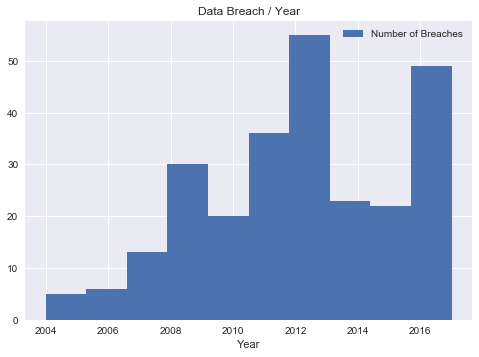

In [18]:
#Histogram of hacks per year
plt.hist(df['YEAR'], label="Number of Breaches")
plt.xlabel('Year')
plt.title('Data Breach / Year')
plt.legend()

### Basic Bar Charts and pie Charts
The following charts give a basic visual representation of the number of different company types that were affected by data breaches and the number of each type of data breaches.

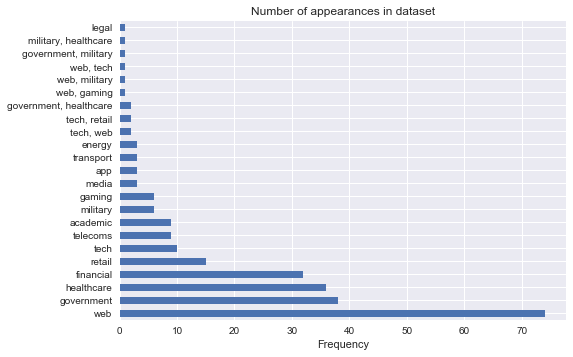

In [19]:
df.COMPANY_TYPE.value_counts().plot(kind='barh')
plt.title('Number of appearances in dataset')
plt.xlabel('Frequency')

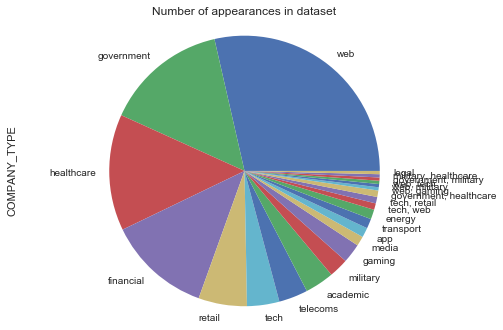

In [20]:
df.COMPANY_TYPE.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Number of appearances in dataset')

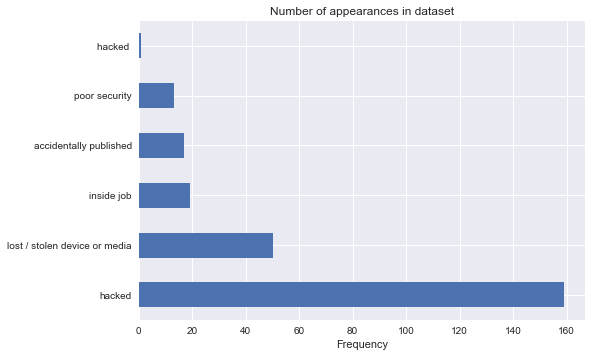

In [21]:
df.METHOD_OF_LEAK.value_counts().plot(kind='barh')
plt.title('Number of appearances in dataset')
plt.xlabel('Frequency')

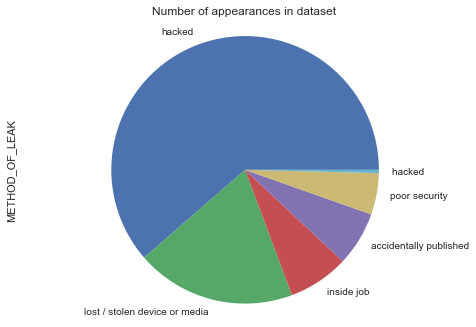

In [22]:
df.METHOD_OF_LEAK.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Number of appearances in dataset')

After seeing these graphs it is clear that the companies that are most vulnerable to attack are web based companies, and the most common type of data breach is a hack. The web based companies could be expected due to the fact that theyre data may be easier to hack, but the government being the second most may have something to do with the hacktivism mentioned above

### Scattered Plots
The scattered plots below show the number of records lost from 2004 to 2017.

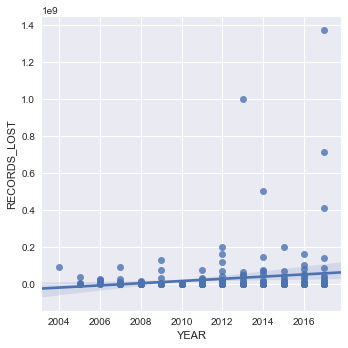

In [23]:
sns.lmplot('YEAR', 'RECORDS_LOST', data=df, fit_reg=True)

In [24]:

# prepare some data
x = df['YEAR']
y = df['RECORDS_LOST']

In [25]:
from bokeh.plotting import figure, show



# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.circle(x, y, size=8)
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Records lost'

# show the results
show(p)

# Visualization with Plotly

In [26]:
Image(url= "https://s3-us-west-1.amazonaws.com/plotly-tutorials/plotly-marketing-pages/images/new-branding/logo/images/plotly-logo-01-stripe%402x.png")

##### Plotly
Plotly is a pyhton package that can be used to produce interactive charts to help better visualize data.

In [27]:
# Visuilization in plotly

In [28]:
import plotly 


# insert your user name and API key
plotly.tools.set_credentials_file(username='zachr21', api_key='9YmxnTXyUWs4ygAzbDNo')

In [29]:
# get names for labels
df.COMPANY_TYPE.value_counts()


web                       74
government                38
healthcare                36
financial                 32
retail                    15
tech                      10
telecoms                   9
academic                   9
military                   6
gaming                     6
media                      3
app                        3
transport                  3
energy                     3
tech, web                  2
tech, retail               2
government, healthcare     2
web, gaming                1
web, military              1
web, tech                  1
government, military       1
military, healthcare       1
legal                      1
Name: COMPANY_TYPE, dtype: int64

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go
# Enter names for labels
labels = ['Web','Government','Healthcare','Financial','Retail','Tech','Telecoms','Academic','Military','Gaming','Media','App','Transport','Energy','Tech/Web','Tech/Retail','Gov/Healthcare','Web/gaming','Web/Military','Web/Tech','Government/Military','Military/Healthcare','Legal']
values = df.COMPANY_TYPE.value_counts()

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~zachr21/0 or inside your plot.ly account where it is named 'basic_pie_chart'


In [31]:
#get names for labels
df.METHOD_OF_LEAK.value_counts()

hacked                           159
lost / stolen device or media     50
inside job                        19
accidentally published            17
poor security                     13
hacked                             1
Name: METHOD_OF_LEAK, dtype: int64

In [32]:
import plotly.plotly as py
import plotly.graph_objs as go
# enter names from of above as labels
fig = {
  "data": [
    {
      "values": df.COMPANY_TYPE.value_counts(),
      "labels": ['Web','Government','Healthcare','Financial','Retail','Tech','Telecoms','Academic','Military','Gaming','Media','App','Transport','Energy','Tech/Web','Tech/Retail','Gov/Healthcare','Web/gaming','Web/Military','Web/Tech','Government/Military','Military/Healthcare','Legal'],
      "domain": {"x": [0, .48]},
      "name": "Company Type",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": df.METHOD_OF_LEAK.value_counts(),
      "labels": [
        "Hacked",
        "Lost/Stolen",
        "Inside Job",
        "Accidentally published",
        "Poor Security",
        "Hacked"
      ],
      "text":"CO2",
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Method of Leak",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Comany Type and Type of Data Breach",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Company",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Breach",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

### Types of Breaches
Below are barcharts of the different types of data breaches. Hacks are the most common of all the data breaches however there are still other methods of breaches that might go unnoticed.

In [33]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=[
        "Hacked",
        "Lost/Stolen",
        "Inside Job",
        "Accidentally published",
        "Poor Security",
        "Hacked"
      ],
            y=df.METHOD_OF_LEAK.value_counts()
    )]

py.iplot(data, filename='basic-bar')

### Records Lost Vs Records Stolen
The next few charts and graphs give a comparison of the number of records lost and the number of records stolen. A majority of the time the two numbers match up however there are a few instances that they do not line up. Keep in mind with plotly the charts are interactive and give you the ability to zoom in on specific areeas.

In [34]:
import plotly.plotly as py
import plotly.graph_objs as go
N = 50
random_x = df['YEAR']
random_y0 = df['RECORDS_LOST']
random_y1 = df['NO OF RECORDS STOLEN']

# Create traces
trace0 = go.Scatter(
    x = random_x,
    y = random_y0,
    mode = 'lines+markers',
    name = 'Records Lost'
)
trace1 = go.Scatter(
    x = random_x,
    y = random_y1,
    mode = 'lines+markers',
    name = 'Records Stolen'
)
data = [trace0, trace1]

py.iplot(data, filename='line-mode')

In [35]:
import plotly.plotly as py
import plotly.graph_objs as go
Year = df['YEAR']
RecordsLost = df['RECORDS_LOST']
RecordsStolen = df['NO OF RECORDS STOLEN']

# Create and style traces
trace0 = go.Scatter(
    x = Year,
    y = RecordsLost,
    name = 'Records Lost',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
)
trace1 = go.Scatter(
    x = Year,
    y = RecordsStolen,
    name = 'Records Stolen',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,dash = 'dash')
)

data = [trace0, trace1]

# Edit the layout
layout = dict(title = 'Records Lost and Stolen',
              xaxis = dict(title = 'YEAR'),
              yaxis = dict(title = 'NO of Records'),
              )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-line')

### Bar Graphs
The next couple of graphs put the Records Lost vs Stolen in bar graph view.

In [36]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=df['YEAR'],
    y=df['RECORDS_LOST'],
    name='Records Lost'
)
trace2 = go.Bar(
    x=df['YEAR'],
    y=df['NO OF RECORDS STOLEN'],
    name='Records Stolen'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [37]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=df['YEAR'],
    y=df['RECORDS_LOST'],
    name='Records Lost'
)
trace2 = go.Bar(
    x=df['YEAR'],
    y=df['NO OF RECORDS STOLEN'],
    name='Records Stolen'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

### Box Plots
The following show box plots of the Recods stolen vs the Recods lost as well as for data sensativity. The box Plots give you the median mean first and third quartile as well as the min and max. With the large spread in the numbers there are outliers so the plot is spread wide. Remember to use the interactive features to zoom to help visualize the data.

In [38]:
import plotly.plotly as py
import plotly.graph_objs as go


x0 = df['RECORDS_LOST']
x1 = df['NO OF RECORDS STOLEN']

LOST = go.Box(x=x0)
STOLEN = go.Box(x=x1)
data = [LOST, STOLEN]
py.iplot(data)

In [39]:
import plotly.plotly as py
import plotly.graph_objs as go


x0 = df['DATA SENSITIVITY']

LOST = go.Box(x=x0)
data = [LOST]
py.iplot(data)

In [40]:
import plotly.plotly as py
import plotly.graph_objs as go

x = df['DATA SENSITIVITY']
data = [go.Histogram(x=x)]

py.iplot(data, filename='basic histogram')

In [41]:
import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Heatmap(z=[df['RECORDS_LOST']])
data=[trace]
py.iplot(data, filename='basic-heatmap')

# Analyze the Data

In [42]:
Image(url= "https://image.slidesharecdn.com/data-analysis-160216200001/95/data-analysis-1-638.jpg?cb=1455652857")

### Sorting
Using the sort by code it helps to display the highest value in a particular column. Below are the highest values in Records lost, Data Sensitivity, and Records Stolen.

In [43]:
df.sort_values('RECORDS_LOST',ascending=False).head()

,COMPANY,YEAR,RECORDS_LOST,COMPANY_TYPE,METHOD_OF_LEAK,NO OF RECORDS STOLEN,DATA SENSITIVITY
231,River City Media,2017,1370000000,web,accidentally published,700000000,20
157,Yahoo,2013,1000000000,web,hacked,1000000000,20
259,Spambot,2017,711000000,web,poor security,711000000,4000
186,Yahoo,2014,500000000,web,hacked,500000000,20
249,Friend Finder Network,2017,412000000,web,hacked,412000000,1


In [44]:
#sort to display the 10 largest breaches in terms of Data Sensitivity
Stolen = df.sort_values('DATA SENSITIVITY',ascending=False)[:10]
Stolen

,COMPANY,YEAR,RECORDS_LOST,COMPANY_TYPE,METHOD_OF_LEAK,NO OF RECORDS STOLEN,DATA SENSITIVITY
188,Korea Credit Bureau,2014,20000000,financial,inside job,20000000,50000
153,Adobe,2013,36000000,tech,hacked,36000000,50000
64,Embassy Cables,2010,251000,government,inside job,300000,50000
65,US Military,2010,260000,military,inside job,300000,50000
71,"South Shore Hospital, Massachusetts",2010,800000,healthcare,lost / stolen device or media,800000,50000
242,ClixSense,2017,6600000,web,hacked,6600000,50000
37,UK Ministry of Defence,2008,1700000,government,lost / stolen device or media,1700000,50000
84,Massachusetts Government,2011,210000,government,hacked,200000,50000
234,Wonga,2017,270000,financial,hacked,270000,50000
254,Equifax,2017,143000000,financial,hacked,143000000,50000


In [45]:
#sort to display the 10 largest breaches in terms of records Stolen
Stolen = df.sort_values('NO OF RECORDS STOLEN',ascending=False)[:10]
Stolen

,COMPANY,YEAR,RECORDS_LOST,COMPANY_TYPE,METHOD_OF_LEAK,NO OF RECORDS STOLEN,DATA SENSITIVITY
157,Yahoo,2013,1000000000,web,hacked,1000000000,20
259,Spambot,2017,711000000,web,poor security,711000000,4000
231,River City Media,2017,1370000000,web,accidentally published,700000000,20
186,Yahoo,2014,500000000,web,hacked,500000000,20
249,Friend Finder Network,2017,412000000,web,hacked,412000000,1
133,Court Ventures,2012,200000000,financial,inside job,200000000,20
212,Deep Root Analytics,2015,198000000,web,poor security,198000000,20
224,MySpace,2016,164000000,web,hacked,164000000,1
128,Massive American business hack,2012,160000000,financial,hacked,160000000,50000
185,Ebay,2014,145000000,web,hacked,145000000,1


In [46]:
records = df.sort_values('RECORDS_LOST',ascending=False)[:10]
records

,COMPANY,YEAR,RECORDS_LOST,COMPANY_TYPE,METHOD_OF_LEAK,NO OF RECORDS STOLEN,DATA SENSITIVITY
231,River City Media,2017,1370000000,web,accidentally published,700000000,20
157,Yahoo,2013,1000000000,web,hacked,1000000000,20
259,Spambot,2017,711000000,web,poor security,711000000,4000
186,Yahoo,2014,500000000,web,hacked,500000000,20
249,Friend Finder Network,2017,412000000,web,hacked,412000000,1
133,Court Ventures,2012,200000000,financial,inside job,200000000,20
212,Deep Root Analytics,2015,198000000,web,poor security,198000000,20
224,MySpace,2016,164000000,web,hacked,164000000,1
128,Massive American business hack,2012,160000000,financial,hacked,160000000,50000
185,Ebay,2014,145000000,web,hacked,145000000,1


In [47]:
df.groupby(['YEAR']).mean()

,RECORDS_LOST,NO OF RECORDS STOLEN,DATA SENSITIVITY
YEAR,,,
2004,9.200000e+07,9.200000e+07,1.000000
2005,1.105625e+07,1.105750e+07,160.000000
2006,1.171667e+07,1.171667e+07,57.166667
2007,1.202203e+07,1.201923e+07,101.769231
2008,4.129156e+06,4.131625e+06,3422.750000
2009,1.834375e+07,1.834014e+07,930.142857
2010,8.068238e+05,8.105000e+05,8752.050000
2011,6.443430e+06,6.444722e+06,2018.055556
2012,2.777023e+07,2.732346e+07,4327.384615


In [48]:
df.groupby(['YEAR']).count()

,COMPANY,RECORDS_LOST,COMPANY_TYPE,METHOD_OF_LEAK,NO OF RECORDS STOLEN,DATA SENSITIVITY
YEAR,,,,,,
2004,1,1,1,1,1,1
2005,4,4,4,4,4,4
2006,6,6,6,6,6,6
2007,13,13,13,13,13,13
2008,16,16,16,16,16,16
2009,14,14,14,14,14,14
2010,20,20,20,20,20,20
2011,36,36,36,36,36,36
2012,26,26,26,26,26,26


In [49]:
df.groupby(['COMPANY_TYPE']).count()

,COMPANY,YEAR,RECORDS_LOST,METHOD_OF_LEAK,NO OF RECORDS STOLEN,DATA SENSITIVITY
COMPANY_TYPE,,,,,,
academic,9,9,9,9,9,9
app,3,3,3,3,3,3
energy,3,3,3,3,3,3
financial,32,32,32,32,32,32
gaming,6,6,6,6,6,6
government,38,38,38,38,38,38
"government, healthcare",2,2,2,2,2,2
"government, military",1,1,1,1,1,1
healthcare,36,36,36,36,36,36


In [50]:
df.groupby(['METHOD_OF_LEAK']).count()

,COMPANY,YEAR,RECORDS_LOST,COMPANY_TYPE,NO OF RECORDS STOLEN,DATA SENSITIVITY
METHOD_OF_LEAK,,,,,,
accidentally published,17,17,17,17,17,17
hacked,159,159,159,159,159,159
hacked,1,1,1,1,1,1
inside job,19,19,19,19,19,19
lost / stolen device or media,50,50,50,50,50,50
poor security,13,13,13,13,13,13


In [54]:
df.corr()

,YEAR,RECORDS_LOST,NO OF RECORDS STOLEN,DATA SENSITIVITY
YEAR,1.000000,0.155321,0.153429,0.194758
RECORDS_LOST,0.155321,1.000000,0.951580,-0.022195
NO OF RECORDS STOLEN,0.153429,0.951580,1.000000,-0.017860
DATA SENSITIVITY,0.194758,-0.022195,-0.017860,1.000000


### Data Analyzation
Given the limitations of this data set and the limititation of data on this topic in general it would be tough to do any further data analyzation on the topic that would be helpful for future attacks. Companies tend to keep most of the information on this topic private so it is hard to find a data set that would be beneficaial in preventing attacks.